In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
1
 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('bc2.csv')
df

,ID,clumpthickness,cell_size,cell_shape,marginal_adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   clumpthickness               699 non-null    int64 
 2   cell_size                    699 non-null    int64 
 3   cell_shape                   699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df= df.replace('?', np.nan)
df = df.apply(lambda X:X.fillna(X.median()),axis=0)
df

,ID,clumpthickness,cell_size,cell_shape,marginal_adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
# converting the hp column from object 
df['Bare Nuclei']=df['Bare Nuclei'].astype('float64')
df.isnull().sum()

ID                             0
clumpthickness                 0
cell_size                      0
cell_shape                     0
marginal_adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
#splitting the data

target = df["Class"]

features = df.drop(["ID", "Class"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [14]:
# building the support vector
svc_model = SVC(C=0.1, kernel= 'linear', gamma=1)
svc_model.fit(X_train, y_train)


SVC(C=0.1, gamma=1, kernel='linear')

In [17]:
prediction = svc_model.predict(X_test)
# checking the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9749552772808586
0.9714285714285714


In [18]:
print('confusion matrix:\n', confusion_matrix(prediction,y_test))

confusion matrix:
 [[82  1]
 [ 3 54]]


<AxesSubplot:>

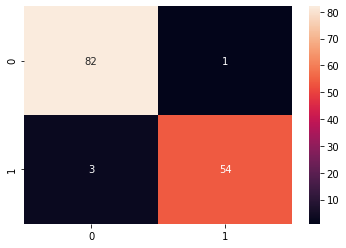

In [22]:
sns.heatmap(confusion_matrix(prediction,y_test),annot=True)

In [20]:
# building a support vector machine on the train data
svc_model1 = SVC(kernel='rbf',C=100, gamma=1)
svc_model1.fit(X_train, y_train)
print(svc_model1.score(X_train, y_train))
print(svc_model1.score(X_test, y_test))


1.0
0.8785714285714286


In [25]:
# building the support vector for the machine
svc_model2 = SVC(C=0.1, kernel= 'poly', gamma=1)
svc_model2.fit(X_train, y_train)


SVC(C=0.1, gamma=1, kernel='poly')

In [26]:
prediction = svc_model.predict(X_test)
# checking the accuracy on the training set
print(svc_model2.score(X_train, y_train))
print(svc_model2.score(X_test, y_test))

1.0
0.9285714285714286


In [27]:
# building the support vector
svc_model3 = SVC(C=0.1, kernel= 'sigmoid', gamma=1)
svc_model3.fit(X_train, y_train)


SVC(C=0.1, gamma=1, kernel='sigmoid')

In [28]:
prediction = svc_model.predict(X_test)
# checking the accuracy on the training set
print(svc_model3.score(X_train, y_train))
print(svc_model3.score(X_test, y_test))

0.667262969588551
0.6071428571428571


In [37]:
svc_model3 = SVC(C=0.5, kernel= 'sigmoid', gamma=1)
svc_model3.fit(X_train, y_train)


SVC(C=0.5, gamma=1, kernel='sigmoid')

In [38]:
prediction = svc_model.predict(X_test)
# checking the accuracy on the training set
print(svc_model3.score(X_train, y_train))
print(svc_model3.score(X_test, y_test))

0.667262969588551
0.6071428571428571
